In [94]:
%matplotlib notebook

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [95]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df= pd.read_csv(mouse_drug_data_to_load)
trial_df= pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_and_drug_df = pd.merge(trial_df, mouse_df,  on = 'Mouse ID')


# Display the data table for preview
mouse_and_drug_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## User Defined Functions

In [96]:
# user defined functions

def Plot_w_error_bars (drugs, df, error_pivot):
    x_axis = df.index
    
    for drug in drugs:
        plt.errorbar(x_axis, df[drug], yerr = error_pivot[drug], marker = 'o', label = drug, linewidth=0.5)
    
    plt.legend(loc= 'best')

    plt.xlabel("Time (days)")
    plt.ylabel( "Tumor Volume (mm3)")
    plt.title ("Tumor Response to Treatment")
    plt.grid()
    
    plt.show
    

## Tumor Response to Treatment

In [97]:
drug_and_timepoint_groupby= mouse_and_drug_df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

tumor_response_df = drug_and_timepoint_groupby["Tumor Volume (mm3)"].mean()
# at this point, tumor_response_df is not a dataFrame, but a multiIndex series,
# by calling unstack on this object, we can convert it to a multi-index dataframe (basically, a pivot table)

tumor_response_df.unstack()

#converts indexes into normal columns
tumor_response_df=tumor_response_df.reset_index()

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [98]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = drug_and_timepoint_groupby['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
standard_error.unstack()
standard_error = standard_error.reset_index()

# Preview DataFrame
standard_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [99]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_df = tumor_response_df
tumor_response_pivot = tumor_response_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')


# Preview that Reformatting worked
tumor_response_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


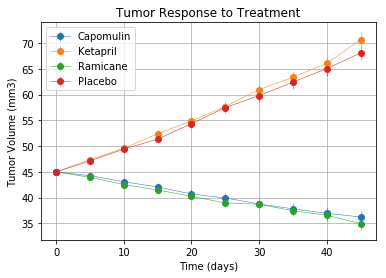

In [100]:
# Generate the Plot (with Error Bars)
x_axis = tumor_response_pivot.index

standard_error_pivot = standard_error.pivot(index = 'Timepoint', columns = 'Drug', 
                                            values = 'Tumor Volume (mm3)')
drugs = ['Capomulin', 'Ketapril','Ramicane', 'Placebo']

Plot_w_error_bars (drugs, tumor_response_pivot, standard_error_pivot)


# Save the Figure
plt.savefig('Tumor Response to Treatment')


In [101]:
# Show the Figure


## Metastatic Response to Treatment

In [102]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_site_df = drug_and_timepoint_groupby['Metastatic Sites'].mean()

# Convert to DataFrame
Met_site_df.unstack()
Met_site_df = Met_site_df.reset_index().set_index(['Drug', 'Timepoint'])

# Preview DataFrame
Met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [103]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Met_site_df_sem = drug_and_timepoint_groupby['Metastatic Sites'].sem()

# Convert to DataFrame
Met_site_df_sem = Met_site_df_sem.reset_index().set_index(['Drug', 'Timepoint'])


# Preview DataFrame
Met_site_df_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [104]:
# Minor Data Munging to Re-Format the Data Frames

Metastasis_pivot = Met_site_df.reset_index().pivot(index = 'Timepoint', 
                                                   columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
Metastasis_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


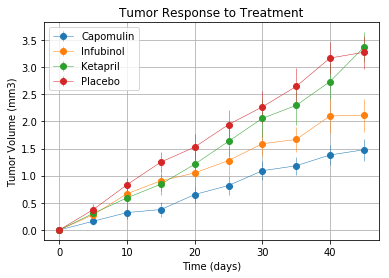

In [105]:
# Generate the Plot (with Error Bars)
drugs = ['Capomulin', 'Infubinol','Ketapril', 'Placebo']

standard_error_met_pivot= Met_site_df_sem.reset_index().pivot(index = 'Timepoint', 
                                                              columns = 'Drug', values = 'Metastatic Sites')

Plot_w_error_bars (drugs, Metastasis_pivot, standard_error_met_pivot)

# Save the Figure
plt.savefig('Tumor Response to Treatment (Standard Error)')

# Show the Figure
plt.show

## Survival Rates

In [106]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
tumor_mouse_df = drug_and_timepoint_groupby['Mouse ID'].count()

# Convert to DataFrame
tumor_mouse_df = tumor_mouse_df.reset_index()

# Preview DataFrame
tumor_mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [107]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mouse_pivot = tumor_mouse_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview the Data Frame
tumor_mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


<function matplotlib.pyplot.show(*args, **kw)>

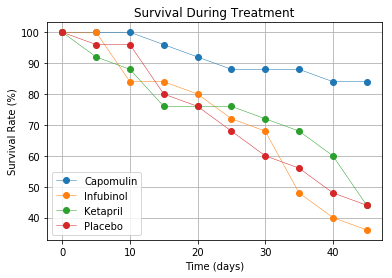

In [132]:
Survival_during_treatment=tumor_mouse_pivot.copy()

for drug in Survival_during_treatment.columns:
    first_val = Survival_during_treatment[drug][0]

    new_vals = []
    
    for val in Survival_during_treatment[drug]:
        val = val/first_val *100
        new_vals.append(val)
    
    Survival_during_treatment[drug]= new_vals


# Generate the Plot (Accounting for percentages)

drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

x_axis = Survival_during_treatment.index
    
for drug in drugs:
    plt.plot(x_axis, Survival_during_treatment[drug], marker = 'o', label = drug, linewidth=0.5)
    
plt.legend(loc= 'best')

plt.xlabel("Time (days)")
plt.ylabel( "Survival Rate (%)")
plt.title ("Survival During Treatment")
    
plt.grid()  

# Save the Figure
plt.savefig('Survival Rate During Treatment')

# Show the Figure
plt.show

## Summary Bar Graph

In [133]:
# Calculate the percent changes for each drug
percent_changes = dict()

for drug in tumor_response_pivot.columns:

    first= tumor_response_pivot.loc[0, drug]
    
    last = tumor_response_pivot.loc[45, drug]
    percent_changes[drug]= (last-first)/first*100

# Display the data to confirm
percent_changes


{'Capomulin': -19.475302667894155,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.12347172785184,
 'Ketapril': 57.02879468660604,
 'Naftisol': 53.923347134769195,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.32090046276666,
 'Stelasyn': 52.085134287898995,
 'Zoniferol': 46.57975086509522}

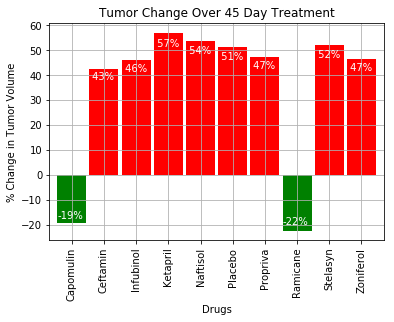

In [137]:
# Store all Relevant Percent Changes into a Tuple
drugs= []
pcts =[]
success= ''


for drug in percent_changes:
    
    drugs.append(drug)
    pcts.append(percent_changes[drug])
    
    #builds a list of color based on negative versus positive outcomes
    if percent_changes[drug] >= 0:
        success += 'r'
    else:
        success +='g'
        
#combine tuples in a data frame, for simple graph generation
changes_df = pd.DataFrame({"Drugs":drugs, "Percent Change": pcts})
changes_df = changes_df.set_index ("Drugs")

#creates bar plot
ax = changes_df.plot(kind = "bar", color = success, width =0.9)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Volume")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Volume")
plt.grid()
ax.get_legend().remove()


#generates formatted annotations list
changes_df["annotations"] = (changes_df["Percent Change"]/100)
changes_df["annotations"] = changes_df["annotations"].map("{: .0%}".format)

index = 0

for p in ax.patches:
    pct = changes_df["annotations"][index]
    ax.annotate(pct, (p.get_x(), p.get_height()*0.9), color = "white", fontsize = 10)
    index +=1


# Save the Figure

plt.savefig('Tumor Change Over 45 Day Treatment')
